In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the output.txt

n_lines = 20
with open('output.txt', 'r') as f:
    cnt = 0
    output = ""
    while cnt < n_lines:
        output += f.readline()
        cnt+=1
        
print(output)

.00
27219; 13.00
27234; 13.0.00
27117; 13.00
27132; 13.00
27147; 13.00
27161; 13.00
27175; 13.00
27190; 13.00
27205; 13.00
27219; 13.00
27234; 13.00; 13.00
0; 13.00
1; 13.00
1; 13.00
2; 13.00
2; 13.00
3; 13.00
5; 13.00
15; 13.00



In [3]:
# first rows are artefacts, skipping them
skiprows=20
df = pd.read_csv('output.txt', sep=';', header=None, skiprows=skiprows)
df.columns = ['t', 'y']
                    
df.head(10)

,t,y
0,26,13.0
1,37,13.0
2,50,13.0
3,61,13.0
4,72,13.0
5,83,13.0
6,95,13.0
7,106,13.0
8,119,13.0
9,132,13.0


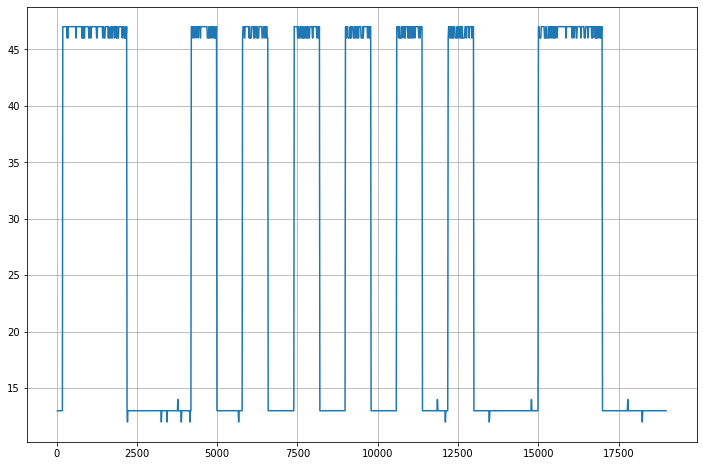

In [4]:
fig = plt.figure(figsize=(12,8))
plt.plot(df.t, df.y)
plt.grid()
plt.show()

### Inspecting the 2 seconds configuration state

In [5]:
# inspecting the configuration state

start = 0 # ms
end   = start+2000 # ms

In [6]:
df[(df.t>start) & (df.t<end)].head()

,t,y
0,26,13.0
1,37,13.0
2,50,13.0
3,61,13.0
4,72,13.0


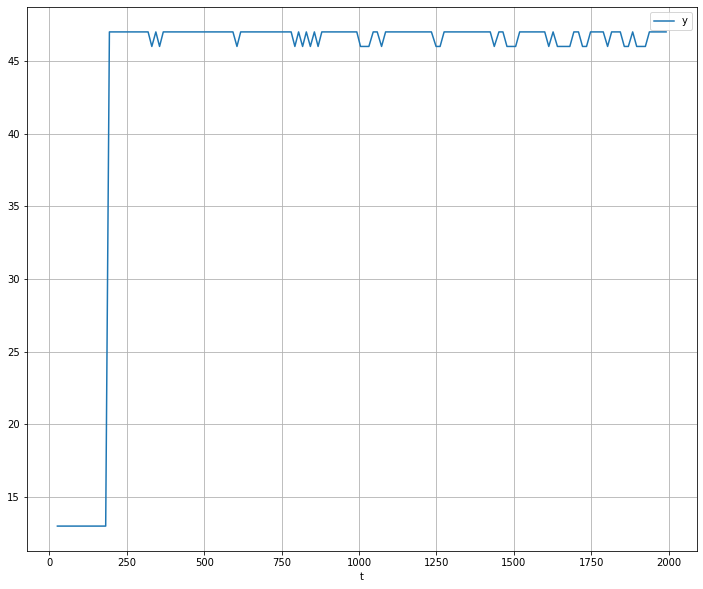

In [7]:
# try to see when we have the state change 0->1
df[(df.t>start) & (df.t<end)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

let's try to get closer... 

In [8]:
# let's see when we have the change 0->1

start = 180        # ms
end   = start+2000 # ms

df[(df.t>start) & (df.t<end)].head(10)

,t,y
13,182,13.0
14,194,47.0
15,206,47.0
16,219,47.0
17,231,47.0
18,244,47.0
19,257,47.0
20,269,47.0
21,281,47.0
22,293,47.0


In [9]:
# ok, around t=194 ms

In [10]:
# let's see now if it lasts exactly 2000 ms
t_0 = 194 
delta = 2000       # one open led for 2 seconds

In [11]:
# check if we see the change 1->0 in the tail
df[(df.t>=t_0) & (df.t<=t_0+delta)].tail()

,t,y
162,2127,46.0
163,2141,47.0
164,2154,46.0
165,2167,46.0
166,2182,47.0


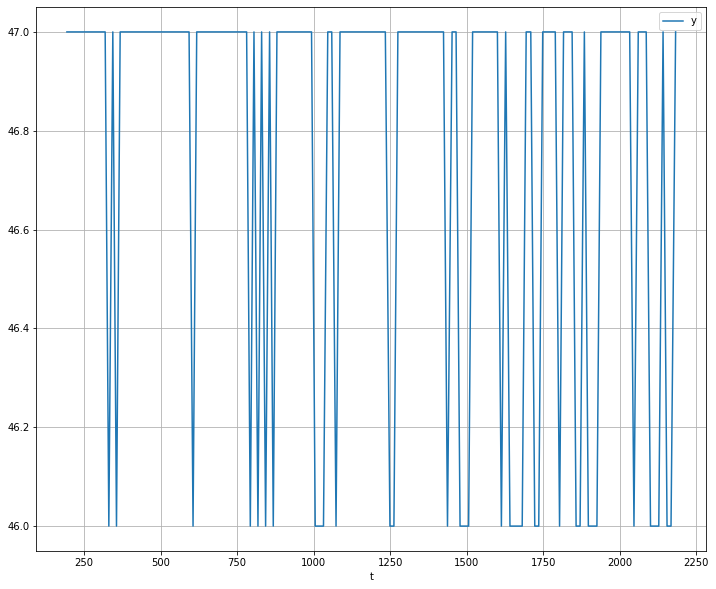

In [12]:
df[(df.t>=t_0) & (df.t<=t_0+delta)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

In [13]:
# we don't se the state change 1->0 after 2000 ms
# so let's try to get a different delta (i.e. 2020ms)
delta=2020

In [14]:
# let's see the tail
df[(df.t>=t_0) & (df.t<=t_0+delta)]

,t,y
14,194,47.0
15,206,47.0
16,219,47.0
17,231,47.0
18,244,47.0
...,...,...
164,2154,46.0
165,2167,46.0
166,2182,47.0
167,2195,13.0


##### Ok, the change is around 2195 ms

In [15]:
2195 - 194

2001

##### OK! we're almost there in terms of milliseconds, in the sense that the configuration state lasts 2001 ~ 2000 ms

In [16]:
delta = 2001

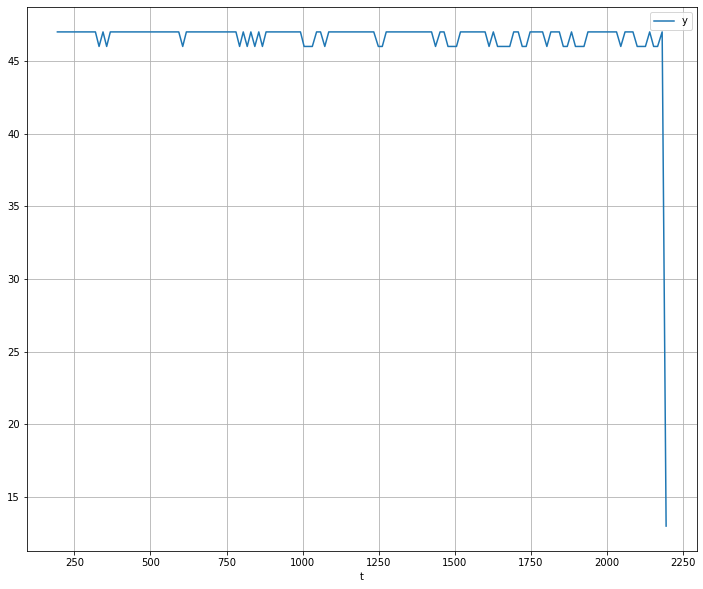

In [17]:
df[(df.t>=t_0) & (df.t<=t_0+delta)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()